   <h1>           Mukhammadali Odilov <h1> 
               Analysis of Bike Sharing (Thesis coding)

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
%matplotlib inline

In [64]:
import pandas as pd
df1=pd.read_csv("Attachment_1596563926.csv")
df1

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [71]:
df0=pd.read_csv("Attachment_1596563920.csv")
df0

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [72]:
df0.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


You will be performing an original data analysis on a large data set that either you
find yourself (preferably work related) or one that I assign.
• You will provide a written paper.
• There will be a milestone to turn in for your paper:
o 20 pts: Data Set & Analysis Proposal
• The written portion is worth 80 points and the milestone are worth 20 points, for a
total of 100 points. This project is worth 30% of your final grade.
• The paper should be between 10-15 pages, and must include the following
components:
o Title Page
o Introduction, which includes a brief background discussion related to the
topic and study
o Data Collection
o Results of data analysis/testing using either R or Python
o Analysis and interpretation of the results
o Conclusion
o References
o The code used for the analysis as an appendix
• Paper must be double spaced.
• Paper must provide all graphs, tables, and calculations. While these will be
accepted as attachments in an appendix, it is preferred that you include them in the
paper at the point they are discussed.
• Paper must demonstrate at least two approaches to data analysis. Examples
include:
o Correlation, descriptive statistics, ANOVA and regression analysis
o Application of various tests as applicable
o Time series analysis as applicable
• Paper should follow APA style guidelines to include citing all references.
• In addition to submitting all your work (final report, codes and notebooks) on
eLearning, a copy of the final report only (not the codes or any notebook) must be
turned in on the Turnitin with the following ID by the due date:

• Absolutely no late papers will be accepted, and any late submission will result in a
score of 0.
• Any violation of academic integrity policy, rules and guidelines will result in a
score of 0 for the entire project. Your data analysis must be original!
• When ideas are used from other sources, these sources must be cited. There should
be no quotations in your paper.
• You are allowed, and in fact, encouraged, to use the writing lab tutors to help you
polish your finished paper.

In [73]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [74]:
df0=df0.drop(['yr','dteday'], axis=1)
df0.head()

,instant,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [70]:
df0.corr()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
mnth,0.830386,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.006117,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,-0.009585,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,-0.002335,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,0.013743,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014524,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.312025,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.319380,0.208096,0.133750,-0.030973,-0.008821,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,0.150625,0.164411,-0.276498,-0.010588,-0.037158,0.015688,0.418130,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911


In [34]:
df0.dtypes

instant           int64
datetime         object
season         category
year           category
month          category
hr                int64
holiday        category
weekday        category
workingday     category
weather        category
temp            float64
atemp           float64
humidity        float64
windspeed       float64
casual            int64
registered        int64
total_rides       int64
dtype: object

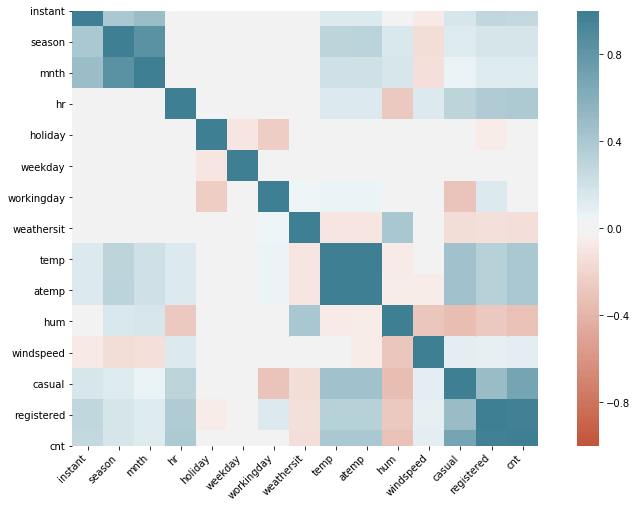

In [75]:
corr = df0.corr()  # whole data frame jo b do
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True

)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'

)
plt.gcf().set_size_inches(14, 8)


In [28]:
df0 = df0.rename(columns={'dteday':'datetime',
                        'yr':'year',
                        'mnth':'month',
                        'weathersit':'weather',
                        'hum':'humidity',
                        'cnt':'total_rides'})
df0.head()

,instant,datetime,season,year,month,hr,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_rides
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [29]:
#set categorical variables
##why set as categories??
df0['season'] = df0['season'].astype('category')
df0['year'] = df0['year'].astype('category')
df0['month'] = df0['month'].astype('category')
df0['holiday'] = df0['holiday'].astype('category')
df0['weekday'] = df0['weekday'].astype('category')
df0['workingday'] = df0['workingday'].astype('category')
df0['weather'] = df0['weather'].astype('category')
df0

,instant,datetime,season,year,month,hr,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_rides
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [9]:
df0['season'].value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

Does season affect bikeshare usage? 
Yes.

As we can see below season has an impact on bikeshare usage. There are the least number of rides in winter and the greatest in summer. The large T-Value of -35.50 and the small P-Value of 5.031e-258 tell us there is a significant difference between summer and winter ridership. The differences in ridership between Spring and Fall however are not significant with a small T-value of 2.37 and a large P-Value of 0.017.

In [10]:
print('Winter vs Spring')
print(ttest_ind(df0.total_rides[df0['season'] == 1], df0.total_rides[df0['season'] == 2]))
print('Winter vs Summer')
print(ttest_ind(df0.total_rides[df0['season'] == 1], df0.total_rides[df0['season'] == 3]))
print('Winter vs Fall')
print(ttest_ind(df0.total_rides[df0['season'] == 1], df0.total_rides[df0['season'] == 4]))
print('Spring vs Fall')
print(ttest_ind(df0.total_rides[df0['season'] == 2], df0.total_rides[df0['season'] == 4]))
print('Spring vs Summer')
print(ttest_ind(df0.total_rides[df0['season'] == 2], df0.total_rides[df0['season'] == 3]))
print('Summer vs Fall')
print(ttest_ind(df0.total_rides[df0['season'] == 3], df0.total_rides[df0['season'] == 4]))

Winter vs Spring
Ttest_indResult(statistic=-28.56228809916416, pvalue=1.5115313254768806e-171)
Winter vs Summer
Ttest_indResult(statistic=-35.503258721186356, pvalue=5.031871922307298e-258)
Winter vs Fall
Ttest_indResult(statistic=-26.162526539941013, pvalue=3.691977909937702e-145)
Spring vs Fall
Ttest_indResult(statistic=2.370523439417162, pvalue=0.01778474157284087)
Spring vs Summer
Ttest_indResult(statistic=-6.759876431441242, pvalue=1.467921954992745e-11)
Summer vs Fall
Ttest_indResult(statistic=9.094821678300208, pvalue=1.156579487676187e-19)


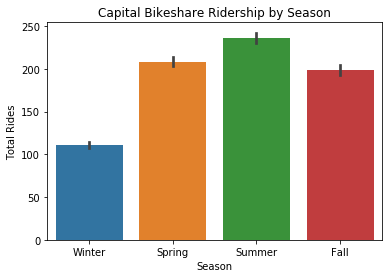

In [11]:
fig, ax = plt.subplots()
sns.barplot(data=df0[['season','total_rides']],
            x='season',
            y='total_rides',
            ax=ax)

plt.title('Capital Bikeshare Ridership by Season')
plt.ylabel('Total Rides')
plt.xlabel('Season')

tick_val=[0, 1, 2, 3]
tick_lab=['Winter', 'Spring', 'Summer', 'Fall']
plt.xticks(tick_val, tick_lab)

plt.show()

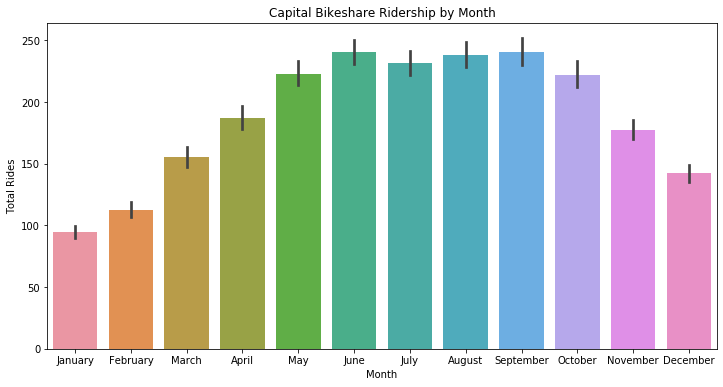

In [12]:
fig, ax = plt.subplots()
sns.barplot(data=df0[['month','total_rides']], x='month', y='total_rides', ax=ax)

plt.title('Capital Bikeshare Ridership by Month')
plt.ylabel('Total Rides')
plt.xlabel('Month')

tick_val=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
tick_lab=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(tick_val, tick_lab)
plt.gcf().set_size_inches(12, 6)

plt.show()

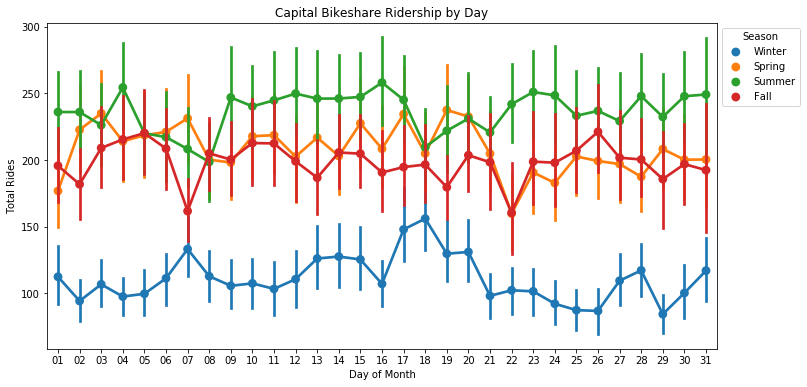

In [13]:
df0['day_of_month'] = df0.datetime.str[-2:]
df0.head()

fig, ax = plt.subplots()
sns.pointplot(data=df0[['day_of_month', 'total_rides', 'season']],
              x='day_of_month',
              y='total_rides',
              hue='season',
              ax=ax)

plt.title('Capital Bikeshare Ridership by Day')
plt.ylabel('Total Rides')
plt.xlabel('Day of Month')
plt.gcf().set_size_inches(12, 6)

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['Winter', 'Spring', 'Summer', 'Fall'], title='Season', bbox_to_anchor=(1, 1), loc=2)

plt.show()


Do ridership trends vary based on type of membership?
Yes.
As we can see below registered riders take more trips than casual riders. The large T-Value of 44.97.81 tells us there is a significant difference between the two groups. The very small P-Value of 0.0 tells us this is unlikely to have occurred by chance.

In [14]:
ttest_ind(df0['registered'], df0['casual'])


Ttest_indResult(statistic=97.81332643791566, pvalue=0.0)

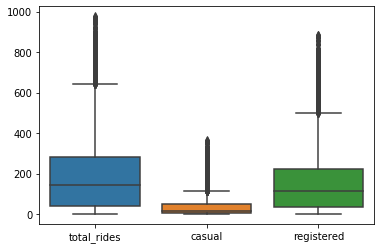

In [15]:
fig = plt.subplot()
sns.boxplot(data=df0[['total_rides', 'casual', 'registered']])

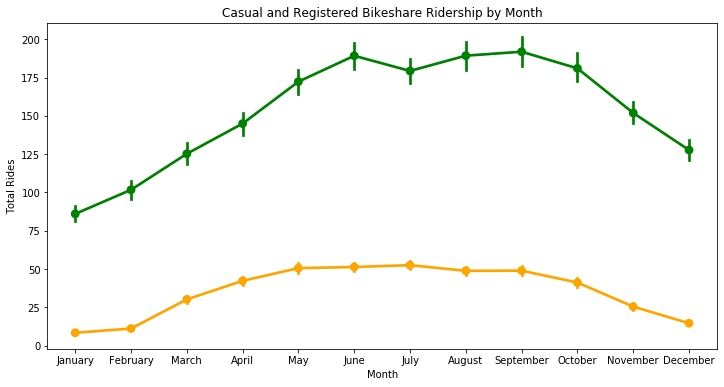

In [16]:
fig, ax = plt.subplots()
sns.pointplot(data=df0[['month', 'casual', 'registered']],
              x='month',
              y='casual',
              ax=ax,
              color='orange')

sns.pointplot(data=df0[['month', 'casual', 'registered']],
              x='month',
              y='registered',
              ax=ax,
              color='green')

tick_val=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
tick_lab=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(tick_val, tick_lab)

plt.title('Casual and Registered Bikeshare Ridership by Month')
plt.ylabel('Total Rides')
plt.xlabel('Month')
plt.gcf().set_size_inches(12, 6)

plt.show()


Does weather affect bikeshare usage?
Yes.
As we can see below, types of weather has a large impact on ridership. There are significantly less rides during snow and thunderstorms than during periods of nicer weather. We can also see that this trend holds up across all seasons.

Types of Weather

1- Clear, Few clouds, Partly cloudy, Partly cloudy

2- Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3- Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

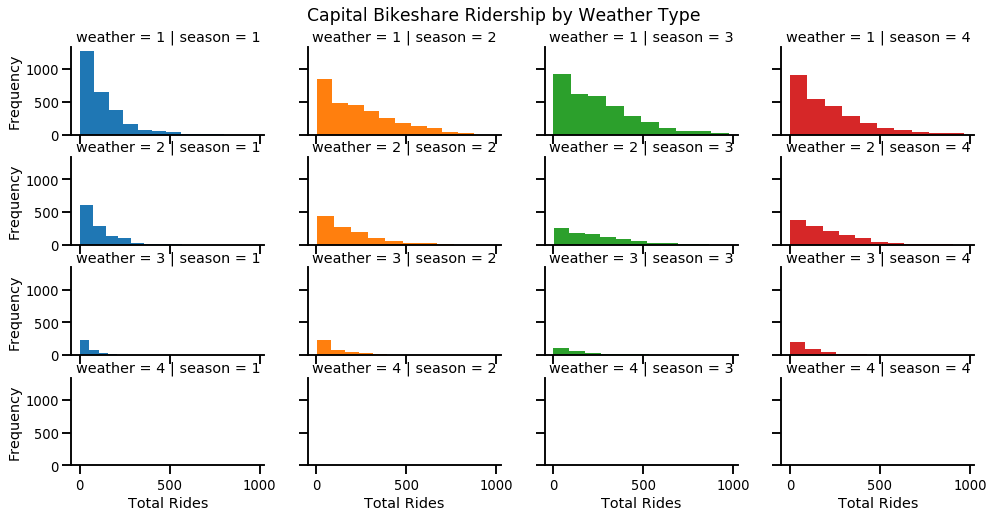

In [42]:
plt.rcParams['figure.figsize'] = [10.0, 10.0]
sns.set_context('talk', font_scale=0.8)

g = sns.FacetGrid(data=df0,
               col='season',
               row='weather',hue='season')
g.map(plt.hist,'total_rides')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Capital Bikeshare Ridership by Weather Type')
plt.gcf().set_size_inches(14, 7)

g.set_xlabels('Total Rides')
g.set_ylabels('Frequency')

plt.show()

# pearson corelation
Filter Method:
As the name suggest, in this method, you filter and take only the subset of the relevant features. The model is built after selecting the features. The filtering here is done using correlation matrix and it is most commonly done using Pearson correlation.Here we will first plot the Pearson correlation heatmap and see the correlation of independent variables with the output variable cnt. We will only select features which has correlation of above 0.3 (taking absolute value) with the output variable

The correlation coefficient has values between -1 to 1
— A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
— A value closer to 1 implies stronger positive correlation
— A value closer to -1 implies stronger negative correlation



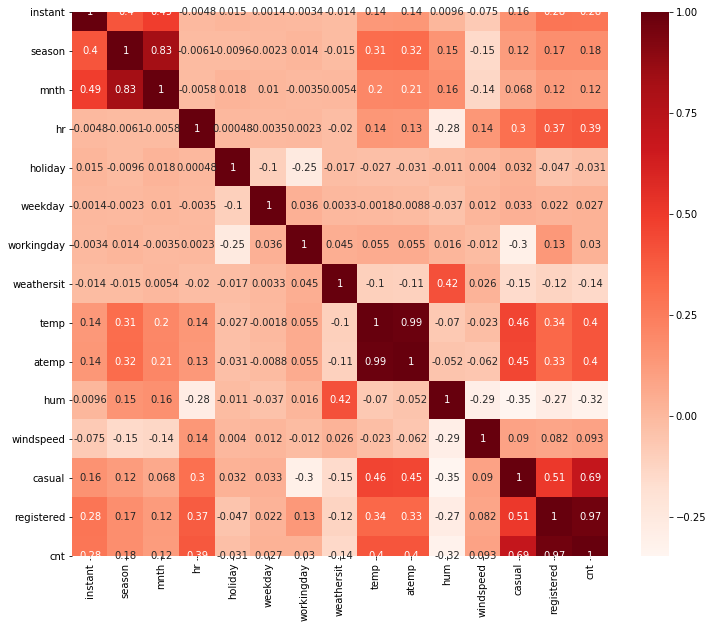

In [33]:
plt.figure(figsize=(12,10))
cor = df0.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
0.69 casual
0.97register
0.4 temp
0.4 atemp
0.4  holiday
0.39  hr


In [35]:
X=df0[['hr','holiday','atemp','temp','casual','registered']]
X.head()

,hr,holiday,atemp,temp,casual,registered
0,0,0,0.2879,0.24,3,13
1,1,0,0.2727,0.22,8,32
2,2,0,0.2727,0.22,5,27
3,3,0,0.2879,0.24,3,10
4,4,0,0.2879,0.24,0,1


In [36]:
Y=df0['cnt']
Y.head()

0    16
1    40
2    32
3    13
4     1
Name: cnt, dtype: int64

In [40]:
from sklearn import linear_model

lr_model=linear_model.LinearRegression()
lr_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
X=df0[['hr','holiday','atemp','temp','casual','registered']]
lr_model.fit(X, df0['cnt'])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
print('The R-square is: ', lr_model.score(X, df0['cnt']))


The R-square is:  1.0


In [ ]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

In [61]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
ano=ols('registered ~ C(cnt) + holiday + atemp + registered +casual +temp', data=df0).fit() #Specify C for Categorical
sm.stats.anova_lm(ano, typ=2)


,sum_sq,df,F,PR(>F)
C(cnt),1.712755e+03,868.0,9.109441e+24,0.000000
holiday,1.793398e-26,1.0,8.279288e-02,0.773551
atemp,1.470289e-26,1.0,6.787642e-02,0.794457
registered,4.576372e+07,1.0,2.112699e+32,0.000000
casual,2.882180e-10,1.0,1.330569e+15,0.000000
temp,4.223059e-25,1.0,1.949591e+00,0.162650
Residual,3.575408e-21,16506.0,NaN,NaN
